<a href="https://colab.research.google.com/github/Luzchange/IH-Stats/blob/main/OEH_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter Emission Rate (G) (mg/min): 10
Enter Ventilation Rate (Q) (m3/min): 10
Enter Room Volume (V) (m3): 5
Enter Number of Iterations for Monte Carlo: 90

Deterministic Result:
Concentration (C): 1.00 mg/m3

Monte Carlo Simulation Results:
Mean Concentration: 1.01 mg/m3
Standard Deviation: 0.17 mg/m3
95th Percentile: 1.28 mg/m3


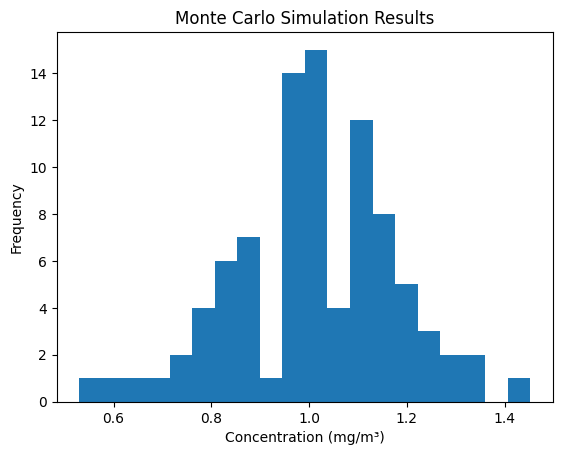


Simulated Concentrations:
   Concentration
0       1.189023
1       1.350392
2       1.102146
3       1.188192
4       0.964028


Output()

Output()


Bayesian Analysis Results:


FutureWarning: The function `traceplot` from PyMC was an alias for `plot_trace` from ArviZ. It was removed in PyMC 4.0. Switch to `pymc.plot_trace` or `arviz.plot_trace`.

In [2]:
import pymc as pm

import pandas as pd
from scipy import stats
import numpy as np
# import pymc3 as pm  # Import PyMC3 for Bayesian analysis
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

# --- Input Parameters ---

# Well-Mixed Room Model
G = float(input("Enter Emission Rate (G) (mg/min): "))
Q = float(input("Enter Ventilation Rate (Q) (m3/min): "))
V = float(input("Enter Room Volume (V) (m3): "))

# Two-Zone Model (uncomment and modify if needed)
# G = float(input("Enter Emission Rate (G) (mg/min): "))
# Q = float(input("Enter Ventilation Rate (Q) (m3/min): "))
# V_n = float(input("Enter Near Field Volume (V_n) (m3): "))
# V_f = float(input("Enter Far Field Volume (V_f) (m3): "))
# k_nf = float(input("Enter Mass Transfer Coefficient (k_nf) (1/min): "))
# k_fn = float(input("Enter Mass Transfer Coefficient (k_fn) (1/min): "))

# Monte Carlo Simulation
iterations = int(input("Enter Number of Iterations for Monte Carlo: "))

# --- Calculations ---

# Well-Mixed Room Model
def well_mixed_room(G, Q, V):
    """
    Calculates the steady-state concentration in a well-mixed room.

    Args:
      G: Emission rate (mg/min)
      Q: Ventilation rate (m3/min)
      V: Room volume (m3)

    Returns:
      C: Concentration (mg/m3)
    """
    C = G / Q
    return C

# Calculate and print the deterministic result
C = well_mixed_room(G, Q, V)
print("\nDeterministic Result:")
print(f"Concentration (C): {C:.2f} mg/m3")

# --- Monte Carlo Simulation ---

def monte_carlo_simulation(func, params, distributions, iterations=10000):
    """
    Performs a Monte Carlo simulation.

    Args:
      func: The function to evaluate (e.g., well_mixed_room)
      params: A dictionary of parameter names and their base values
      distributions: A dictionary of parameter names and their distributions
                     (e.g., {'G': stats.norm(loc=10, scale=2)})
      iterations: The number of iterations

    Returns:
      results: An array of simulation results
    """
    results = []
    for _ in range(iterations):
        # Generate random values for each parameter based on the specified distribution
        param_values = {
            param: dist.rvs() for param, dist in distributions.items()
        }
        # Evaluate the function (e.g., well_mixed_room) with the random parameters
        result = func(**{**params, **param_values})
        results.append(result)
    return np.array(results)

# Example usage (modify distributions as needed)
params = {'Q': Q, 'V': V}  # Use input values for Q and V
distributions = {'G': stats.norm(loc=G, scale=2)}  # Example: G follows a normal distribution
results = monte_carlo_simulation(well_mixed_room, params, distributions, iterations)

# --- Analyze and Output Monte Carlo Results ---

print("\nMonte Carlo Simulation Results:")
print(f"Mean Concentration: {np.mean(results):.2f} mg/m3")
print(f"Standard Deviation: {np.std(results):.2f} mg/m3")
print(f"95th Percentile: {np.percentile(results, 95):.2f} mg/m3")

# Histogram of the simulated concentrations
plt.hist(results, bins=20)  # Adjust the number of bins as needed
plt.xlabel('Concentration (mg/m³)')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation Results')
plt.show()

# Tabular output of the simulated concentrations using pandas
df = pd.DataFrame({'Concentration': results})
print("\nSimulated Concentrations:")
print(df.head())  # Print the first few rows
# ... (You can print the entire DataFrame or save it to a file)

# --- Bayesian Statistics ---

# Example using PyMC3 (modify the model and priors as needed)
with pm.Model() as model:
    # Priors for the parameters (example: normal priors)
    G_prior = pm.Normal("G", mu=G, sigma=2)  # Prior for G
    Q_prior = pm.Normal("Q", mu=Q, sigma=1)  # Prior for Q

    # Likelihood (assuming normal distribution of the concentration)
    C_obs = pm.Normal("C_obs", mu=G_prior / Q_prior, sigma=1, observed=C)

    # Inference (using MCMC sampling)
    trace = pm.sample(2000, tune=1000)

# Analyze the posterior distributions
print("\nBayesian Analysis Results:")
pm.summary(trace)

# --- Further analysis of the posterior distributions ---

# Plot the posterior distributions
pm.traceplot(trace)
plt.show()

# Plot posterior histograms
pm.plot_posterior(trace)
plt.show()

# Calculate credible intervals
G_ci = pm.stats.hpd(trace['G'])
Q_ci = pm.stats.hpd(trace['Q'])
print(f"95% Credible Interval for G: {G_ci}")
print(f"95% Credible Interval for Q: {Q_ci}")

In [3]:
!pip install ipywidgets
import pymc as pm
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- Input Parameters ---
# Well-Mixed Room Model
G = float(input("Enter Emission Rate (G) (mg/min): "))
Q = float(input("Enter Ventilation Rate (Q) (m3/min): "))
V = float(input("Enter Room Volume (V) (m3): "))

# --- Calculations ---
# Well-Mixed Room Model
def well_mixed_room(G, Q, V):
    C = G / Q
    return C

# --- Monte Carlo Simulation ---
def monte_carlo_simulation(func, params, distributions, iterations=10000):
    results = []
    for _ in range(iterations):
        param_values = {param: dist.rvs() for param, dist in distributions.items()}
        result = func(**{**params, **param_values})
        results.append(result)
    return np.array(results)

# --- Interactive Widget ---
def update_output(iterations):
    clear_output(wait=True)

    params = {'Q': Q, 'V': V}
    distributions = {'G': stats.norm(loc=G, scale=2)}
    results = monte_carlo_simulation(well_mixed_room, params, distributions, iterations)

    # --- Analyze and Output Monte Carlo Results ---
    print("\nMonte Carlo Simulation Results:")
    print(f"Mean Concentration: {np.mean(results):.2f} mg/m3")
    print(f"Standard Deviation: {np.std(results):.2f} mg/m3")
    print(f"95th Percentile: {np.percentile(results, 95):.2f} mg/m3")

# Create slider widget
iterations_slider = widgets.IntSlider(
    value=1000,
    min=100,
    max=10000,
    step=100,
    description='Iterations:',
    continuous_update=False,
)

# Link slider to update_output function
widgets.interactive(update_output, iterations=iterations_slider)

# Display the interactive plot
display(iterations_slider)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00
Enter Emission Rate (G) (mg/min): 10
Enter Ventilation Rate (Q) (m3/min): 10
Enter Room Volume (V) (m3): 10


IntSlider(value=1000, continuous_update=False, description='Iterations:', max=10000, min=100, step=100)